In [1]:
!pip install ultralytics


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from ultralytics import YOLO

In [3]:
import numpy as np

In [4]:
#load pretrained YOLOv8n model
model = YOLO("yolov8n.pt", "v8")

In [5]:
detection_output = model.predict(source="a.jpg", conf=0.25, save=True)


image 1/1 C:\Users\Duke\Desktop\coc\a.jpg: 384x640 1 person, 1 couch, 4 potted plants, 1 tv, 400.8ms
Speed: 10.0ms preprocess, 400.8ms inference, 5271.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs\detect\predict6


In [6]:
print(detection_output)

[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant'

In [7]:
print(detection_output[0].numpy())

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant',

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from IPython.display import Image

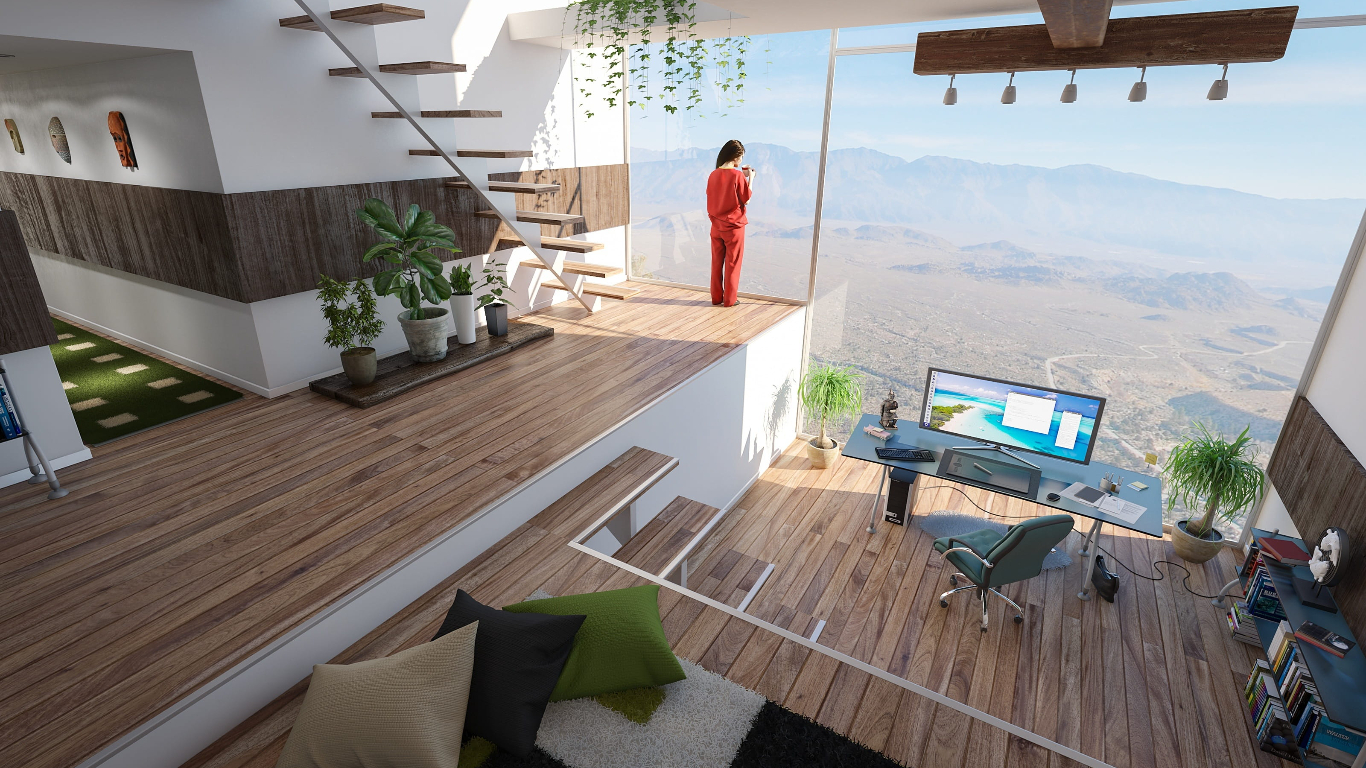

In [10]:
Image("a.jpg")

In [11]:
import cv2 as cv
import random

In [12]:
# opening the file in read mode
my_file = open("coco.txt", "r")

In [13]:
data = my_file.read()

In [14]:
class_list = data.split("\n")

In [15]:
my_file.close()

In [16]:
#Generate random colors from class list
detection_colors = []
for i in range(len(class_list)):
  r = random.randint(0, 255)
  g = random.randint(0, 255)
  b = random.randint(0, 255)
  detection_colors.append((b,g,r))



In [17]:
#Vals to resize video frames | small frame optimize to run
frame_wid = 640
frame_hyt = 480

In [18]:
cap = cv.VideoCapture("a.jpg")


image 1/1 C:\Users\Duke\Desktop\coc\frame.png: 384x640 1 person, 2 potted plants, 1 tv, 488.7ms
Speed: 7.0ms preprocess, 488.7ms inference, 6.0ms postprocess per image at shape (1, 3, 384, 640)
Can't resolve frame (stream end?). Exiting...


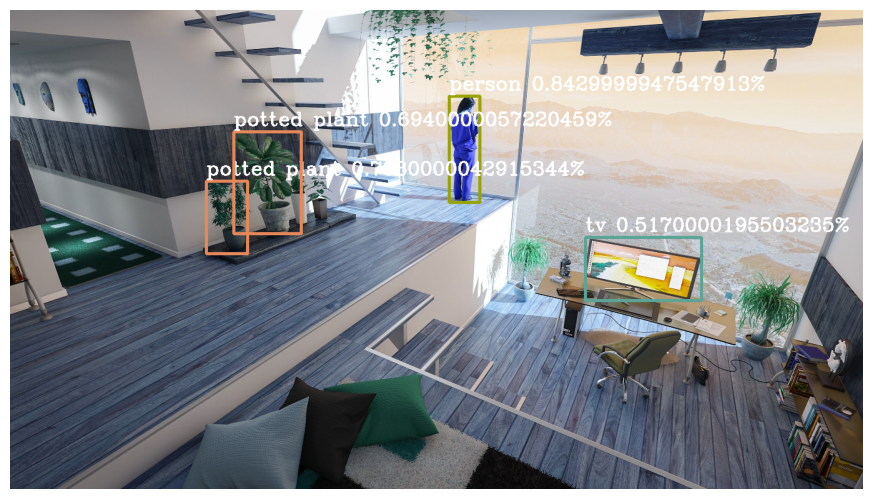

In [19]:
if not cap.isOpened():
    print("Cannot open Camera")
    exit()

while True:
    # Capture frame-by-frame
    ret, frame = cap.read()
    # if frame is read correctly ret is True
    if not ret:
        print("Can't resolve frame (stream end?). Exiting...")
        break

    # resize the frame | small frame optimize the run
    # frame = cv2.resize(frame, (frame_vid, frame_hyt))

    cv.imwrite("frame.png", frame)

    # Predict on Image
    detect_params = model.predict(source='frame.png', conf=0.45, save=False)

    # Convert tensor array to numpy
    DP = detect_params[0].cpu().numpy()

    if len(DP) != 0:
        # Loop through all detections in current frame
        for i in range(len(detect_params[0])):
            boxes = detect_params[0].boxes
            box = boxes[i]
            clsID = box.cls.cpu().numpy()[0]
            conf = box.conf.cpu().numpy()[0]
            bb = box.xyxy.cpu().numpy()[0]

            cv.rectangle(
                frame,
                (int(bb[0]), int(bb[1])),
                (int(bb[2]), int(bb[3])),
                detection_colors[int(clsID)],
                3
            )

            # Display class name and confidence
            font = cv.FONT_HERSHEY_COMPLEX
            cv.putText(frame,
                       f"{class_list[int(clsID)]} {round(conf, 3)}%",
                       (int(bb[0]), int(bb[1] - 10)),
                       font,
                       1,
                       (255, 255, 255),
                       2
            )

    #Display the resulting frame
    import matplotlib.pyplot as pyplot
    plt.figure(figsize=(11,11))
    plt.axis("off")
    plt.imshow(frame)

    #Terminate run when "Q" pressed
    if cv.waitKey(1) == ord("q"):
        break

  #When everything done, release the capture
cap.release()
cv.destroyAllWindows()